In [1]:
#import statements
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load in data
df = sklearn.datasets.load_digits()

#Seperate data from labels 
X = df['data']
y = df['target']

#Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)


In [3]:
#train random forest model: 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_leaf_nodes=3)

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7579972183588317

In [4]:
#train k-nearest neighbors 
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=8)
kn.fit(X_train, y_train)
kn.score(X_test, y_test)


0.9791376912378303

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.3949930458970793

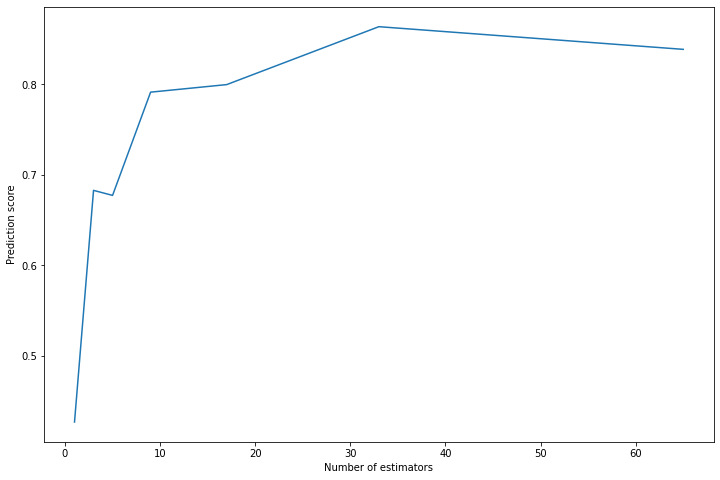

In [12]:
#Experiment with different values of estimators 

n_estimators = [1, 3, 5, 9 ,17, 33, 65]
scores = []
for e in n_estimators: 
  rft = RandomForestClassifier(n_estimators=e, max_depth=3)
  rft.fit(X_train, y_train)
  scores.append(rft.score(X_test, y_test))
  

plt.figure
plt.figure(figsize=(12,8))
plt.plot(n_estimators, scores)
plt.xlabel('Number of estimators')
plt.ylabel('Prediction score')
plt.show()



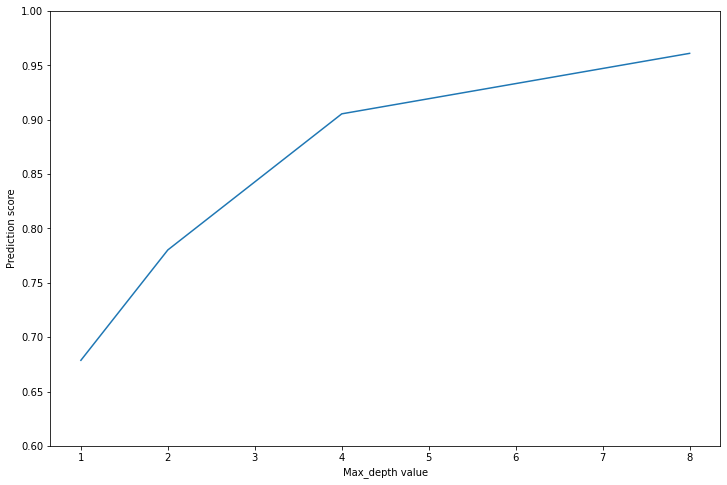

In [27]:
#Experiment with different values of max_depth 
max_depths = [None, 1, 2, 4, 8]
scores = []

for d in max_depths: 
  rf = RandomForestClassifier(max_depth=d)
  rf.fit(X_train, y_train)
  scores.append(rf.score(X_test, y_test))

plt.figure
plt.figure(figsize=(12,8))
plt.ylim(0.60, 1)
plt.plot(max_depths, scores)
plt.xlabel('Max_depth value')
plt.ylabel('Prediction score')
plt.show()

In [8]:
#Experiment with different values for max_features
max_features = ['auto', 'sqrt', 'log2']
scores = []


#Max features is decided by taking the square root
rf_sqrt = RandomForestClassifier(max_features = 'sqrt')
rf_sqrt.fit(X_train, y_train) 
scores.append(rf_sqrt.score(X_test, y_test))

#Max features is decided by taking the log2 
rf_log = RandomForestClassifier(max_features = 'log2')
rf_log.fit(X_train, y_train) 
scores.append(rf_log.score(X_test, y_test))

# #Max features is decided by taking the int  
# rf_int = RandomForestClassifier(max_features = 2)
# rf_int.fit(X_train, y_train) 
# scores.append(rf_int.score(X_test, y_test))

# #Max features is decided by taking the float 
# rf_float = RandomForestClassifier(max_features = 'float')
# rf_float.fit(X_train, y_train) 
# scores.append(rf_float.score(X_test, y_test))

#Max features is decided by n_features 
rf_none = RandomForestClassifier(max_features = None)
rf_none.fit(X_train, y_train) 
scores.append(rf_none.score(X_test, y_test))


print(scores)

[0.9735744089012517, 0.9694019471488178, 0.952712100139082]
